In [6]:
import sys
proj_path = "/opt/algo_team/OnlineProject/search_python/"
sys.path.append(proj_path)
from tools_util.calculate_tools import today_1
from tools_util.spark_query_data import *
from P_parameter.hive_table_name import  *

In [10]:
query_data_from_spark('''
select count(1) from 
algorithm_data.searchpy_candidate_word_union_active
where dt='20250303'
and add_date='20250303'
''').show()


select count(1) from 
algorithm_data.searchpy_candidate_word_union_active
where dt='20250303'
and add_date='20250303'



[Stage 4:=======================================>                   (2 + 1) / 3]

+--------+
|count(1)|
+--------+
|    4461|
+--------+



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
x=np.arange(0,6,0.1)

In [48]:
y1=np.sin(x)
y2=np.cos(x)

Text(0, 0.5, 'y')

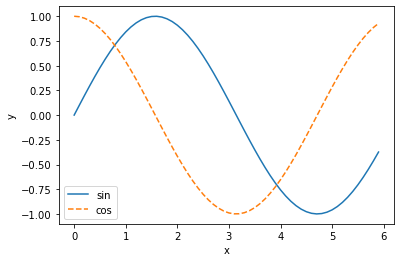

In [57]:
plt.plot(x,y1,label='sin')
plt.plot(x,y2,linestyle='--',label='cos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [58]:
x=np.array([1,2])

In [59]:
y=x>0

In [62]:
y.astype(int)

array([1, 1])

In [63]:
a='s'

In [64]:
a.astype(str)

AttributeError: 'str' object has no attribute 'astype'

### 阶跃函数

In [78]:
def step_functio(x):
    return (x>0).astype(int)
x=np.arange(-10,10,0.01)
y1=step_functio(x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
y2=sigmoid(x)

plt.plot(x,y1)
plt.plot(x,y2)

In [84]:
np.max
np.maximum

<function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

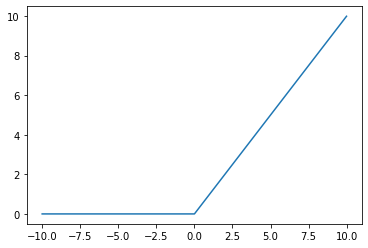

In [85]:
def relu(x):
    return np.maximum(0,x)
x=np.arange(-10,10,0.01)
y1=relu(x)
plt.plot(x,y1)

### 矩阵乘法

In [86]:
x=np.array([[1,2,3],[2,3,4]])
y=np.array([1,1,1,1,1,1]).reshape(3,2)

In [88]:
np.dot(x,y)

array([[6, 6],
       [9, 9]])

### 神经网络实现

In [106]:
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    return network


def softmax(x):
    ##softmax溢出对策
    c=np.max(x)
    return np.exp(x-c)/(np.exp(x-c)).sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def identity_function(x):
    return softmax(x)



In [107]:
def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    #第一层
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    #第二层
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    #第三层
    a3=np.dot(z2,W3)+b3

    
    y=identity_function(a3)
    return y

In [108]:
x=np.array([1.0,0.5])
forward(init_network(),x)

array([0.40625907, 0.59374093])

In [110]:
def softmax(x):
    c=np.max(x)
    return np.exp(x-c)/(np.exp(x-c)).sum()

In [116]:
import torch
from torchvision import datasets, transforms

# 定义数据转换（归一化像素值到 [-1, 1]）
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 下载训练集和测试集
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# 创建数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 404: Not Found

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1091)>



RuntimeError: Error downloading train-images-idx3-ubyte.gz